In [1]:
import pipeline
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# path to where the images are located
img_loc = '2016jul14/'

In [3]:
# indices of images
skys = 95, 99
flats = 1, 20
darks = 21, 30 # only using the ones that match integration time. could be fancy and use others

### Master dark = average all darks

In [7]:
master_dark = pipeline.average(img_loc, *darks)
np.min(master_dark), np.max(master_dark), np.mean(master_dark)

(-414.7, 58619.4, 3.9295252799987788)

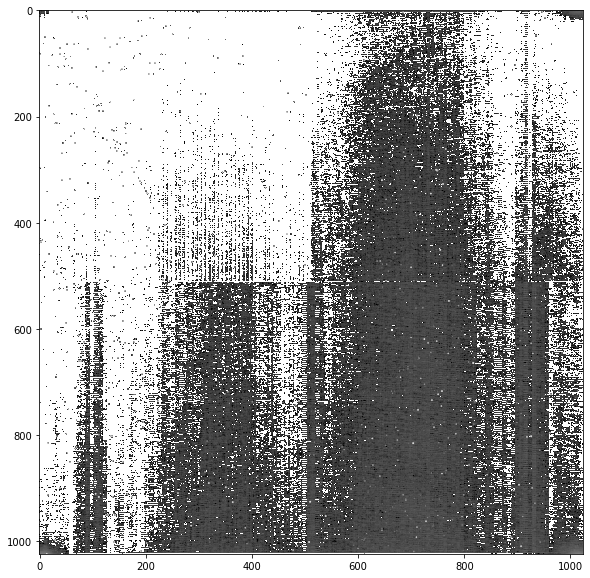

In [8]:
pipeline.plot_img(master_dark)

In [9]:
np.sum(master_dark > 10000) # there's hot (much dark current?) pixels

214

In [10]:
ave_dark = np.mean(master_dark) / 30 # average amount of dark current per pixel, per second. maybe should be median
ave_dark

0.1309841759999593

In [38]:
np.save('master_dark.npy', master_dark)

### Master flat = average all flats, then subtract dark

In [31]:
master_flat = pipeline.average(img_loc, *flats)
# flat has longer integration time, so scale dark accordingly (?)
master_flat -= master_dark*45/30
np.min(master_flat), np.max(master_flat), np.mean(master_flat)

(-85520.75, 3836.3, 3203.6989770412447)

In [33]:
np.median(master_flat)

3247.85

In [39]:
np.save('master_flat.npy', master_flat)

In [36]:
master_flat_norm = (master_flat - np.mean(master_flat))
master_flat_norm /= np.max(master_flat_norm)
np.min(master_flat_norm), np.max(master_flat_norm)

(-140.25340737209956, 1.0)

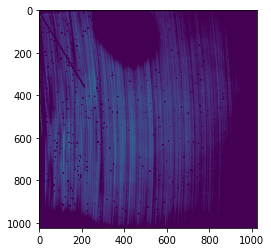

In [37]:
plt.imshow(master_flat_norm, vmin=0)

### Master sky = average all flats, then subtract dark, then divide out flat

In [20]:
master_sky = pipeline.average(img_loc, *skys)
master_sky -= master_dark
master_sky /= master_flat
np.min(master_sky), np.max(master_sky), np.mean(master_sky)

(-14.615384615384617, 24.55412844036697, 0.03845486575262367)

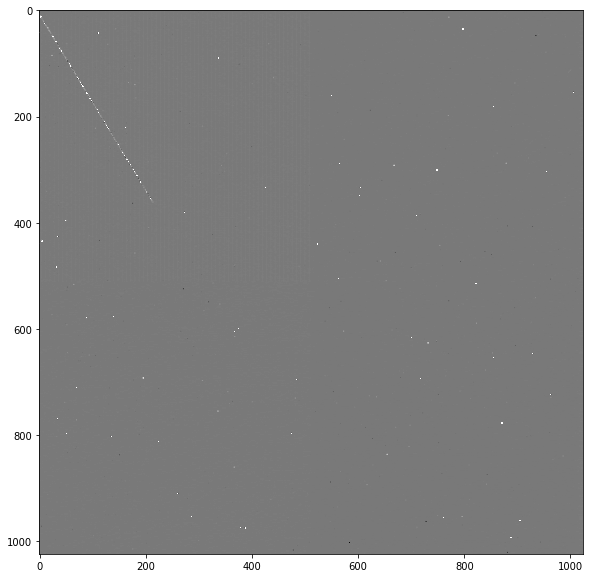

In [21]:
pipeline.plot_img(master_sky)

### Clean frame = subtract dark, then divide flat, then subtract sky

In [22]:
acq = pipeline.average(img_loc, 165, 165)
acq -= master_dark
acq /= master_flat
acq -= master_sky
np.min(acq), np.max(acq), np.mean(acq)

(-64.07339449541284, 19.291553133514988, -0.00047160424334701954)

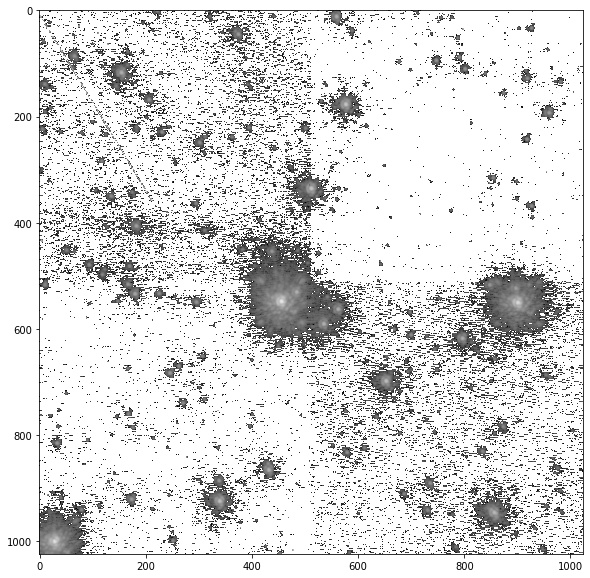

In [23]:
pipeline.plot_img(acq)

In [41]:
acq = pipeline.average(img_loc, 175, 175)
acq -= master_dark
acq /= master_flat
acq -= master_sky
np.min(acq), np.max(acq), np.mean(acq)

(-53.28440366972477, 49.000000000000014, -0.0003331163858380871)

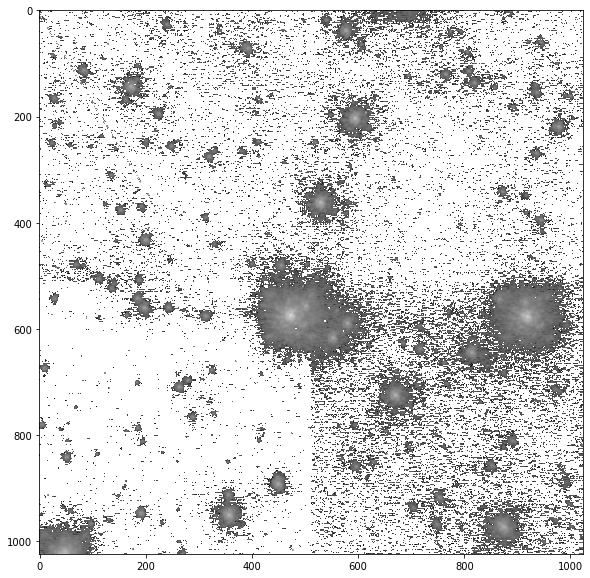

In [42]:
pipeline.plot_img(acq)

### Random tests

In [50]:
master_flat_with_dark = pipeline.average(img_loc, *flats)

In [51]:
np.min(master_flat), np.min(master_flat_with_dark)
# some very hot pixel (in the darks) is apparently not very hot in the flat, leading to huge negative

(-85520.75, -115.45)